In [180]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [181]:
%matplotlib inline

In [182]:
# load data
companies = pd.read_csv(r'1000_Companies.csv')
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [183]:
x = companies.iloc[:,:-1].values
y = companies.iloc[:,4].values # profit

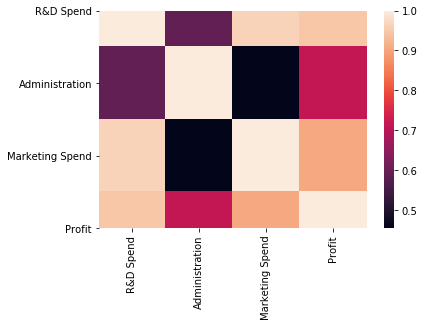

In [184]:
# visualization
sns.heatmap(companies.corr())

In [185]:
#encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
# print(x[:,3])
x[:,3] = labelencoder.fit_transform(x[:,3]) # conver text to number like: 0 1 2 3 ...
# print(x[:,3])
# print(x)
onehotencoder = OneHotEncoder(categorical_features=[3])
x = onehotencoder.fit_transform(x).toarray()
# print(x)

C:\Users\Nitish sharma\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Nitish sharma\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [186]:
# avoid dummy data
x = x[:,1:]

In [187]:
# traning
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.9, random_state = 0)

In [188]:
# filter multiple range
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [189]:
y_pred = regressor.predict(x_test)

In [190]:
#calculate coefficient
print(regressor.coef_)
print(regressor.intercept_)

[-5.53199031  8.61039507  0.50566647  0.18092895  0.16670474]
17592.813210032647


In [191]:
from sklearn.metrics import r2_score 

In [195]:
r2_score(y_test,y_pred)*100


89.75080129432833